Setup and load the dataset


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime



In [4]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [5]:
df= pd.read_csv("Fake.csv")

In [6]:
print(df.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


Converting Date to date-time format


In [7]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Sort dataset by date
df = df.sort_values(by='date')

# Check for null values in date column
df['date'].isnull().sum()


11613

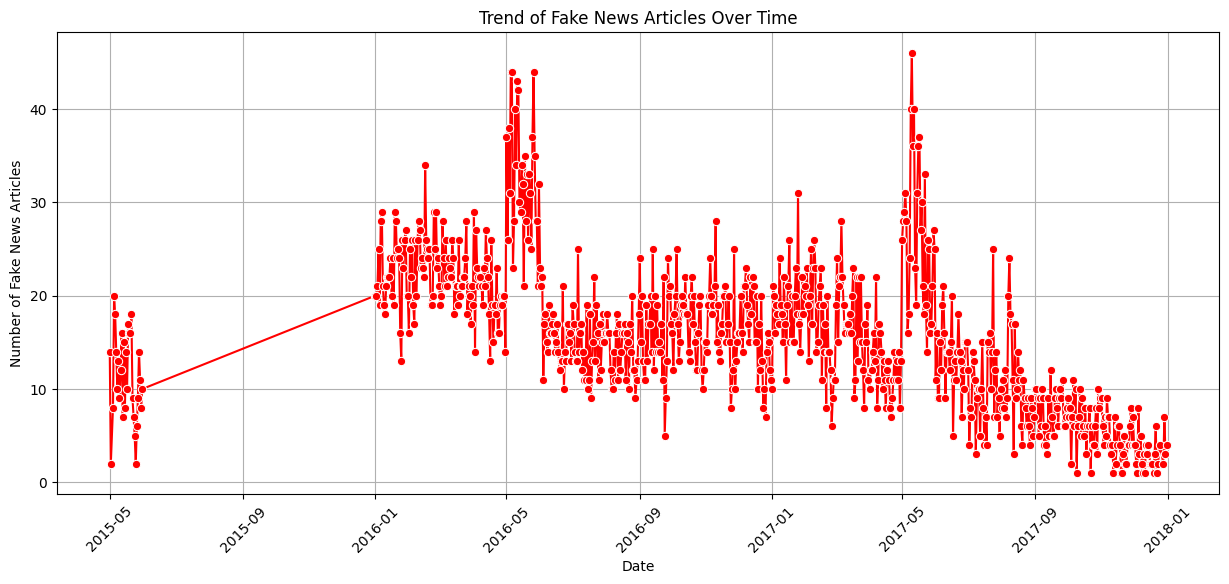

In [9]:
# Calculate daily article counts
daily_articles = df.groupby('date')['text'].count().reset_index() # Group by date and count articles
daily_articles.columns = ['date', 'count'] # Rename columns for clarity

# Plotting the trend
plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_articles, x="date", y="count", marker='o', color='red') # Use the created daily_articles DataFrame

plt.xlabel("Date")
plt.ylabel("Number of Fake News Articles")
plt.title("Trend of Fake News Articles Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Seasonal Trend Analysis using moving averages

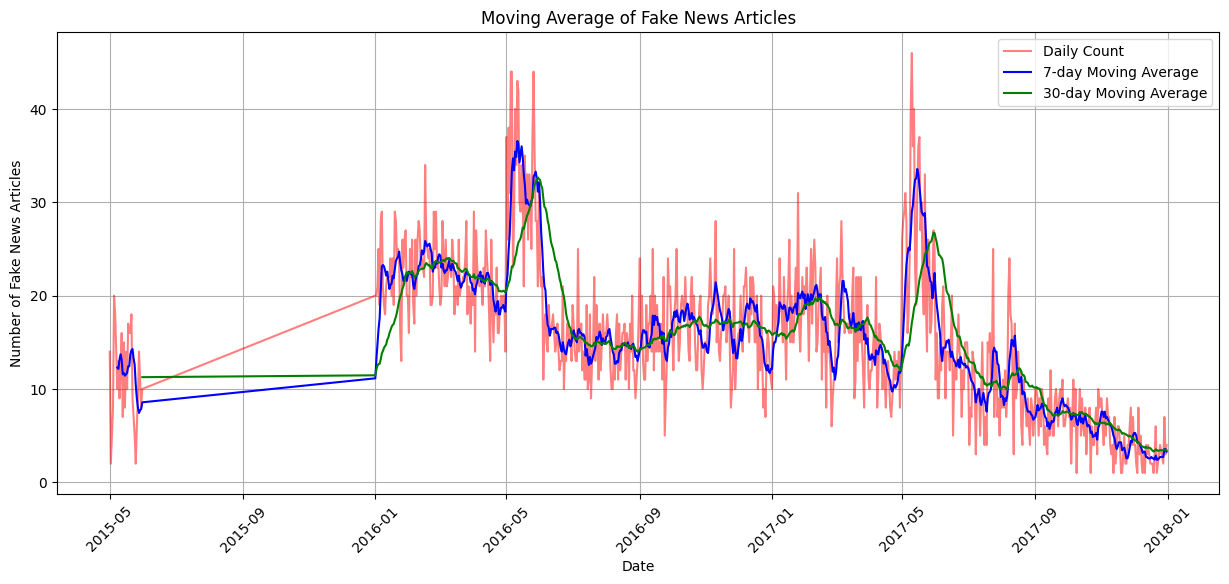

In [10]:
# Compute 7-day and 30-day rolling averages
daily_articles['7-day MA'] = daily_articles['count'].rolling(window=7).mean()
daily_articles['30-day MA'] = daily_articles['count'].rolling(window=30).mean()

# Plot rolling averages
plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_articles, x="date", y="count", label="Daily Count", color='red', alpha=0.5)
sns.lineplot(data=daily_articles, x="date", y="7-day MA", label="7-day Moving Average", color='blue')
sns.lineplot(data=daily_articles, x="date", y="30-day MA", label="30-day Moving Average", color='green')

plt.xlabel("Date")
plt.ylabel("Number of Fake News Articles")
plt.title("Moving Average of Fake News Articles")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Time Series Decomposition (Trend, Seasonality, Residuals)


<Figure size 1200x800 with 0 Axes>

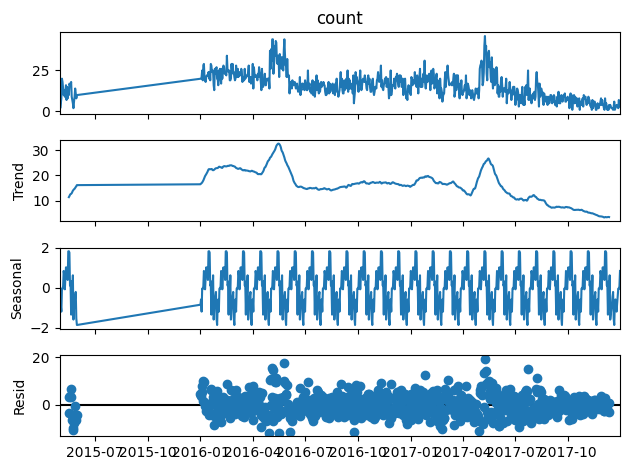

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert date column to datetime index
daily_articles.index = pd.to_datetime(daily_articles['date'])

# Apply decomposition
decomposition = seasonal_decompose(daily_articles['count'], model='additive', period=30)

# Plot components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


Predicting Future Fake News Trends (ARIMA Model)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

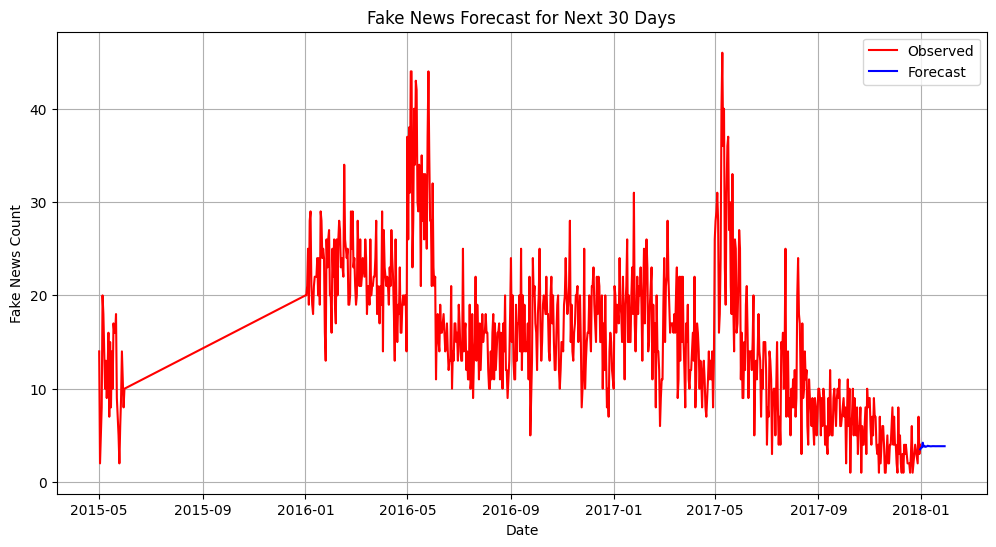

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare dataset for ARIMA
time_series = daily_articles.set_index('date')['count']

# Fit ARIMA model (AutoRegressive Integrated Moving Average)
model = ARIMA(time_series, order=(5,1,0))  # (p,d,q) parameters
model_fit = model.fit()

# Forecast for next 30 days
forecast = model_fit.forecast(steps=30)

# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Observed", color='red')
plt.plot(pd.date_range(start=time_series.index[-1], periods=30, freq='D'), forecast, label="Forecast", color='blue')

plt.xlabel("Date")
plt.ylabel("Fake News Count")
plt.title("Fake News Forecast for Next 30 Days")
plt.legend()
plt.grid(True)
plt.show()


Anomaly Detection (Fake News Spikes)


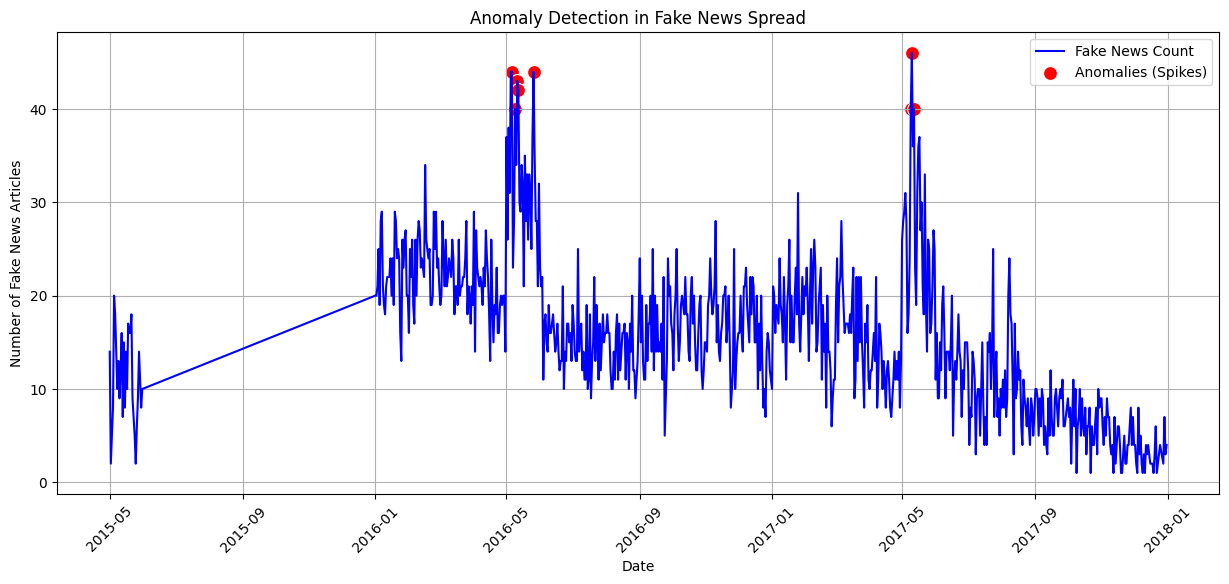

In [13]:
from scipy.stats import zscore

# Compute Z-scores
daily_articles['z_score'] = zscore(daily_articles['count'])

# Mark anomalies where Z-score > 3 (high spikes)
anomalies = daily_articles[daily_articles['z_score'] > 3]

# Plot anomalies
plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_articles, x="date", y="count", color='blue', label="Fake News Count")
sns.scatterplot(data=anomalies, x="date", y="count", color='red', s=100, label="Anomalies (Spikes)")

plt.xlabel("Date")
plt.ylabel("Number of Fake News Articles")
plt.title("Anomaly Detection in Fake News Spread")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Optimize ARIMA Model using AIC/BIC

In [14]:
!pip install statsmodels


Grid Search for ARIMA (p, d, q)

In [15]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ignore warnings
warnings.filterwarnings("ignore")

# Load and prepare the dataset
df['date'] = pd.to_datetime(df['date'], errors='coerce')
daily_articles = df.groupby(df['date'].dt.date).size()
daily_articles = daily_articles.to_frame(name="count").reset_index()

# Set the time-series index
time_series = daily_articles.set_index('date')['count']

# Define range for p, d, q
p = range(0, 5)  # Autoregression terms
d = range(0, 2)  # Differencing terms
q = range(0, 5)  # Moving Average terms

# Generate all possible (p, d, q) combinations
pdq_combinations = list(itertools.product(p, d, q))

# Store best parameters
best_aic = np.inf  # Initialize with a large number
best_bic = np.inf
best_pdq = None
best_model = None

# Grid search for best parameters
for pdq in pdq_combinations:
    try:
        model = ARIMA(time_series, order=pdq)
        model_fit = model.fit()

        # Compare AIC/BIC values
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_bic = model_fit.bic
            best_pdq = pdq
            best_model = model_fit

        print(f"ARIMA{pdq} - AIC:{model_fit.aic:.2f}, BIC:{model_fit.bic:.2f}")

    except:
        continue

print("\nBest Model:", best_pdq, "with AIC:", best_aic, "and BIC:", best_bic)


ARIMA(0, 0, 0) - AIC:5281.78, BIC:5291.03
ARIMA(0, 0, 1) - AIC:4946.85, BIC:4960.74
ARIMA(0, 0, 2) - AIC:4788.25, BIC:4806.77
ARIMA(0, 0, 3) - AIC:4706.48, BIC:4729.63
ARIMA(0, 0, 4) - AIC:4664.05, BIC:4691.83
ARIMA(0, 1, 0) - AIC:4702.23, BIC:4706.86
ARIMA(0, 1, 1) - AIC:4468.27, BIC:4477.53
ARIMA(0, 1, 2) - AIC:4461.64, BIC:4475.52
ARIMA(0, 1, 3) - AIC:4460.30, BIC:4478.81
ARIMA(0, 1, 4) - AIC:4461.95, BIC:4485.09
ARIMA(1, 0, 0) - AIC:4618.77, BIC:4632.66
ARIMA(1, 0, 1) - AIC:4470.71, BIC:4489.23
ARIMA(1, 0, 2) - AIC:4465.67, BIC:4488.82
ARIMA(1, 0, 3) - AIC:4465.05, BIC:4492.83
ARIMA(1, 0, 4) - AIC:4466.25, BIC:4498.65
ARIMA(1, 1, 0) - AIC:4564.57, BIC:4573.83
ARIMA(1, 1, 1) - AIC:4460.48, BIC:4474.37
ARIMA(1, 1, 2) - AIC:4462.18, BIC:4480.69
ARIMA(1, 1, 3) - AIC:4462.20, BIC:4485.34
ARIMA(1, 1, 4) - AIC:4461.61, BIC:4489.38
ARIMA(2, 0, 0) - AIC:4532.69, BIC:4551.21
ARIMA(2, 0, 1) - AIC:4464.84, BIC:4487.98
ARIMA(2, 0, 2) - AIC:4466.67, BIC:4494.44
ARIMA(2, 0, 3) - AIC:4466.87, BIC:

Train ARIMA with Optimal Parameters

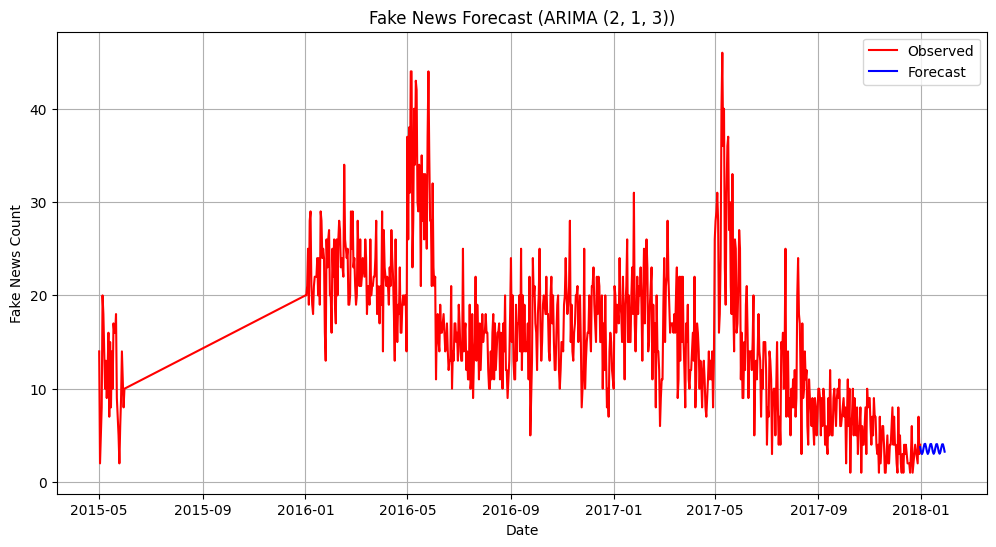

In [16]:
# Train ARIMA with best parameters
optimal_model = ARIMA(time_series, order=best_pdq)
optimal_model_fit = optimal_model.fit()

# Forecast for next 30 days
forecast = optimal_model_fit.forecast(steps=30)

# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Observed", color='red')
plt.plot(pd.date_range(start=time_series.index[-1], periods=30, freq='D'), forecast, label="Forecast", color='blue')

plt.xlabel("Date")
plt.ylabel("Fake News Count")
plt.title(f"Fake News Forecast (ARIMA {best_pdq})")
plt.legend()
plt.grid(True)
plt.show()
